# Decision Trees: 
## *Introduction and Advanced Techniques*

## Introduction to Decision Trees
Decision Trees are versatile and powerful machine learning models that can be used for both classification and regression tasks. They are intuitive and easy to understand, making them popular in various domains.

A Decision Tree is a flowchart-like structure where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents the outcome or class label. The decision rules are based on splitting the data based on different feature values to maximize information gain or minimize impurity.

### Simple Decision Trees

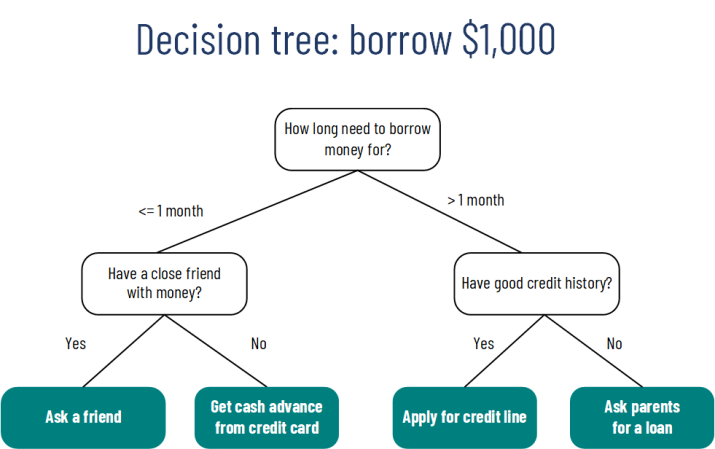

### Part of a decision tree
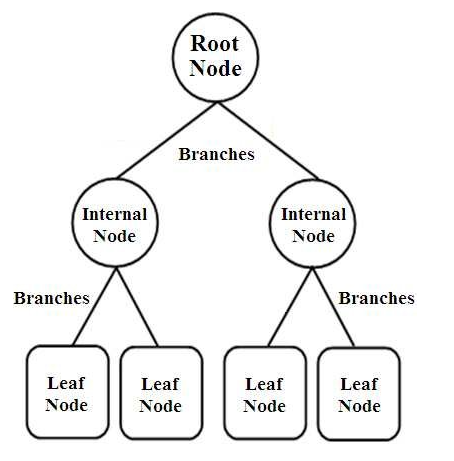


### Classification Trees
In classification tasks, decision trees are used to classify instances into different classes or categories. Each leaf node represents a class label, and the decision rules guide the flow of instances through the tree until a class label is assigned.

Here's an example of using scikit-learn to create a classification decision tree:

we'll make use of the Loan data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
data = pd.read_csv("cleaned-loan.csv")

In [2]:
data.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0.0,0.0,1.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1,1.0,1.0,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,1,1.0,0.0,1.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,1,1.0,0.0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,1,0.0,0.0,1.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [3]:
del data["Unnamed: 0"]

In [4]:
data.describe()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [6]:
X = data.drop("Loan_Status", axis=1)
y = data['Loan_Status']

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict class labels for test data
y_pred = clf.predict(X_test)

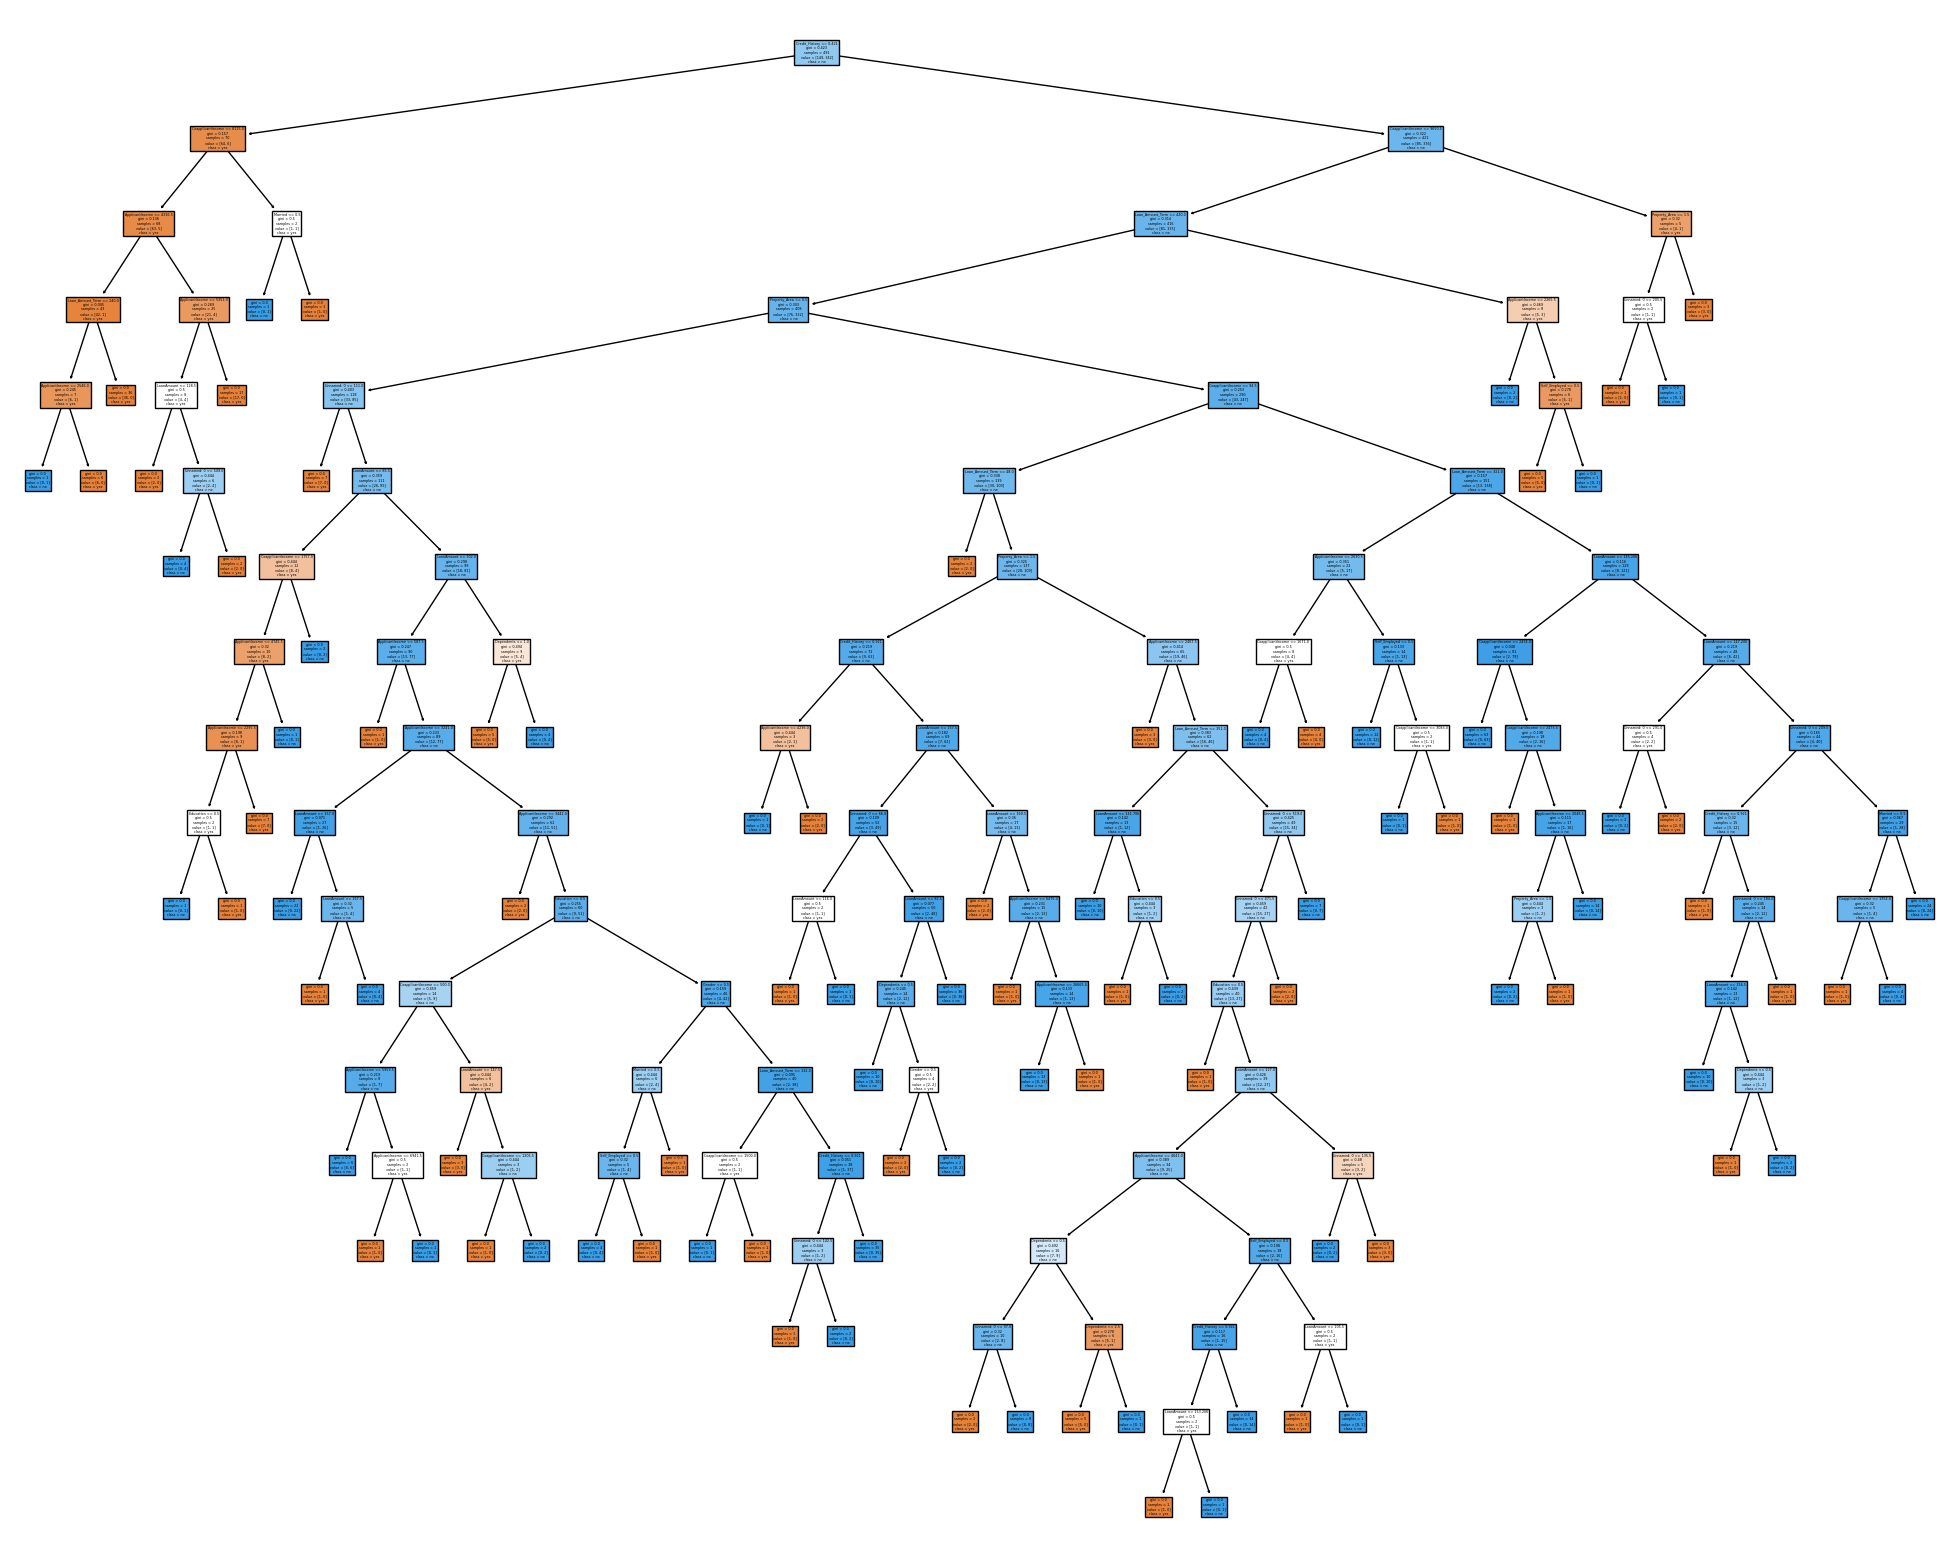

In [21]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=["yes", "no"],
                   filled=True)

## Tree Pruning
Decision trees tend to overfit the training data, resulting in poor generalization to unseen data. Tree pruning is a technique used to reduce overfitting by removing unnecessary branches or nodes from the tree.

Pruning can be done through pre-pruning or post-pruning techniques. Pre-pruning involves stopping the growth of the tree early based on certain conditions, such as limiting the maximum depth or minimum number of samples required to split a node. Post-pruning, also known as cost-complexity pruning or just pruning, involves growing the tree fully and then pruning back branches that don't provide significant improvement in performance.

In [23]:
# Prune the decision tree by setting the maximum depth
pruned_clf = DecisionTreeClassifier(max_depth=3)

# Train the pruned classifier on the training data
pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

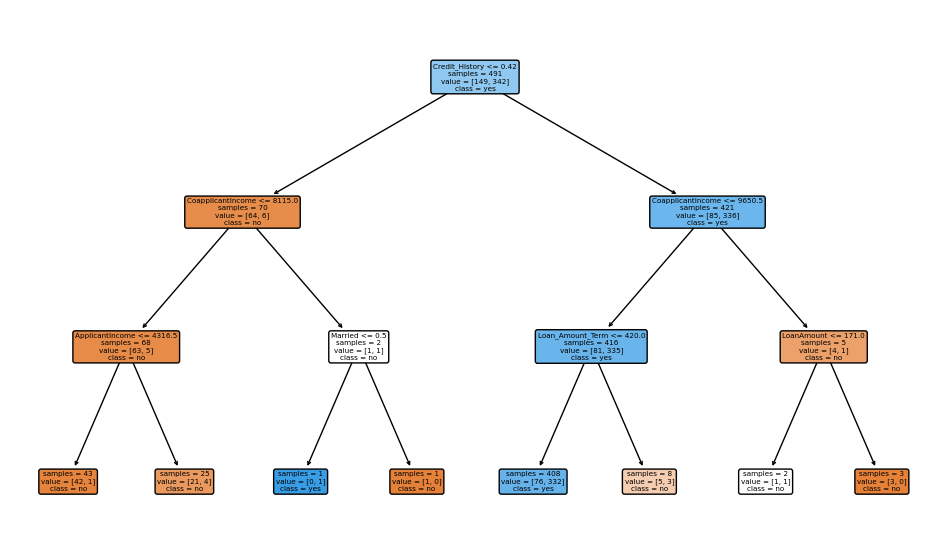

In [36]:
fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(pruned_clf, 
                   feature_names=X_train.columns,  
                   class_names=["no","yes"],
                   filled=True,
                    rounded=True,
                    impurity=False,
                    proportion=False,
                    precision=2)

Pruning helps to simplify the tree, improve its interpretability, and enhance its generalization ability.

## Regression Trees
In regression tasks, decision trees are used to predict continuous numeric values. Instead of class labels, the leaf nodes contain predicted values based on the average or median of the target variable in that leaf.

we have consider regression tree previously.

In [37]:
#here's the code
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor
reg = DecisionTreeRegressor()

# Train the regressor on the training data
reg.fit(X_train, y_train)

# Predict target values for test data
y_pred = reg.predict(X_test)


Decision Tree Regressor can also be pruned and plotted

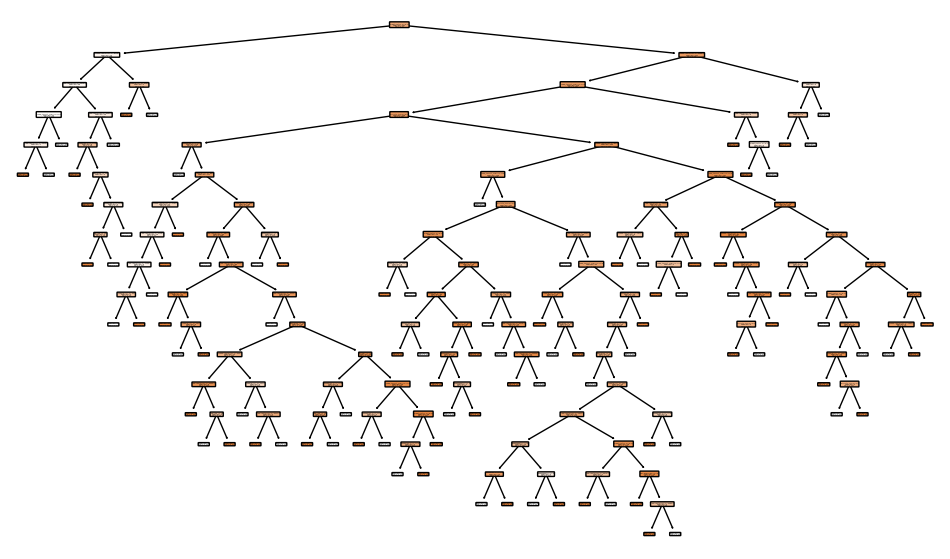

In [39]:
fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(reg, 
                   feature_names=X_train.columns,  
                   class_names=["no","yes"],
                   filled=True,
                    rounded=True,
                    impurity=False,
                    proportion=False,
                    precision=2)

# Advanced Ensemble Techniques
Ensemble learning is a powerful technique in machine learning that combines multiple individual models to improve overall predictive performance. It leverages the diversity and collective wisdom of multiple models to make more accurate predictions. Advanced ensemble techniques further enhance the performance of ensemble models and are widely used in various machine learning tasks. Here are some popular advanced ensemble techniques:


#### Bagging
Bagging, short for Bootstrap Aggregating, is a technique that creates multiple subsets of the training data by sampling with replacement. Each subset is then used to train a separate base model (e.g., decision tree, SVM, etc.). The final prediction is obtained by aggregating the predictions of all individual models. Bagging helps to reduce variance and increase stability, making it effective in reducing overfitting.



In [45]:
# Bagging
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bagging.fit(X_train, y_train)
predictions = bagging.predict(X_test)

/home/mr-robot/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Random Forest
Random Forest is an extension of bagging that combines multiple decision trees to form a more robust ensemble model. In Random Forest, each decision tree is trained on a different subset of the training data, and at each split, a random subset of features is considered. The final prediction is made by averaging the predictions of all the trees. Random Forest is known for its high accuracy, scalability, and ability to handle high-dimensional data.


In [41]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

### Gradient Boosting
Gradient Boosting is a boosting algorithm that combines multiple weak models (e.g., decision trees) in a stage-wise manner. It builds the model sequentially, where each subsequent model corrects the mistakes of the previous models. Gradient Boosting optimizes a loss function by iteratively fitting new models to the residuals of the previous models. This technique achieves high predictive accuracy and handles complex relationships in the data.



In [42]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(n_estimators=100)
gradient_boosting.fit(X_train, y_train)
predictions = gradient_boosting.predict(X_test)

### ADA Boost
ADA Boost, short for Adaptive Boosting, is another boosting algorithm that sequentially combines weak models. ADA Boost assigns weights to each training sample, emphasizing the misclassified samples in subsequent iterations. It adjusts the weights to give more importance to misclassified samples, enabling the model to focus on challenging instances. ADA Boost is effective in handling imbalanced datasets and has good generalization capabilities.



In [46]:
# ADA Boost
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X_train, y_train)
predictions = ada_boost.predict(X_test)

### XG Boost
XG Boost is an optimized implementation of Gradient Boosting that offers better performance and efficiency. It incorporates several advanced features, such as regularization, parallel processing, and tree pruning, to improve accuracy and speed. XG Boost is widely used in various machine learning competitions and is known for its scalability and ability to handle large datasets.


In [ ]:
# XG Boost
import xgboost as xgb

xgboost = xgb.XGBClassifier(n_estimators=100)
xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)


These advanced ensemble techniques provide powerful tools for improving the performance of machine learning models. They offer robustness, accuracy, and the ability to handle complex data patterns. Choosing the most suitable ensemble technique depends on the characteristics of the dataset and the specific problem at hand